We present the distribution of the RF predictor w.r.t. three Kernels for a sinusoidal dataset for various values of $P$ and $\lambda$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import matplotlib.font_manager as font_manager
from utils import *

# making a sinusoidal dataset
np.random.seed(400)
X1 = np.sort(np.random.rand(6) * 2*np.pi)
N2 = 100 
X2 = np.linspace(0, 2*np.pi, N2) # sampling the input linearly for the interval of intereset
Y1 = np.sin(X1)
Y2 = np.sin(X2)

# some helper functions to make the plots
def pred_fun(lambd, P, ker, num_trials = 100): 
    Y2pred_all = np.zeros((N2, num_trials))
    for itr in range(num_trials):
        Y1pred, Y2pred = pred(X1, X2, Y1, P, lambd, ker)
        Y2pred_all[:,itr] = Y2pred
    return Y2pred_all

def make_plot(Y2pred_m, Y2pred_s, ax):
    ax.fill_between(X2, Y2pred_m - 2*Y2pred_s, Y2pred_m + 2*Y2pred_s, color='grey', alpha = 0.2)
    ax.plot(X2, Y2pred_all[:,0], 'blue', linestyle='dashed', alpha = 0.8, label='RF')
    for k in range(1,5):
        ax.plot(X2, Y2pred_all[:,k], 'blue', linestyle='dashed', alpha = 0.8)
    ax.plot(X2, Y2pred_m, 'black', linewidth = 2.5, label='meanRF')
    ax.plot(X1, Y1, 'o', color='red', markersize = 7)
    ax.set_xlim(0, 2*np.pi);
    ax.set_ylim(-3, 3)
    ax.set_xticks([]); 
    ax.set_yticks([]);

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part


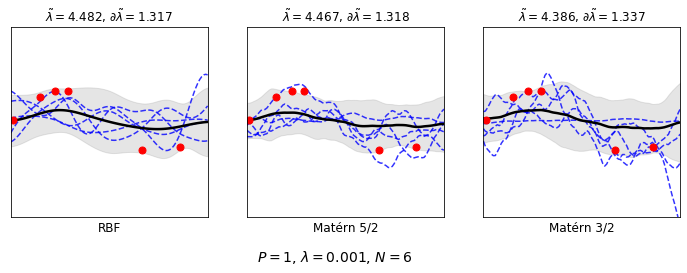

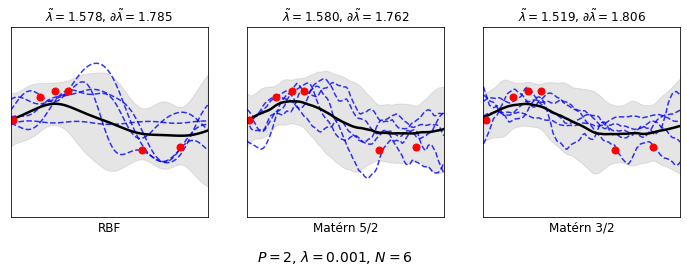

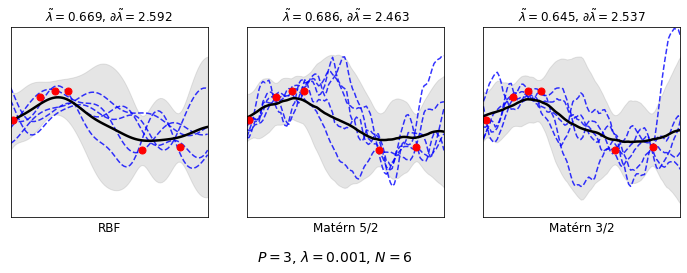

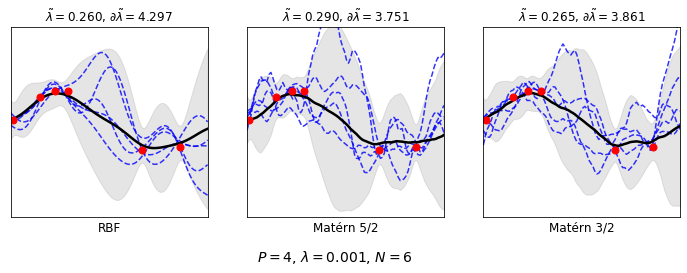

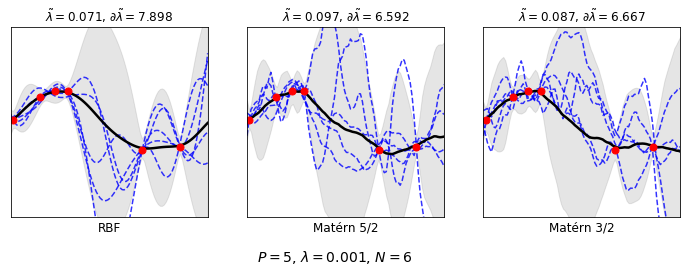

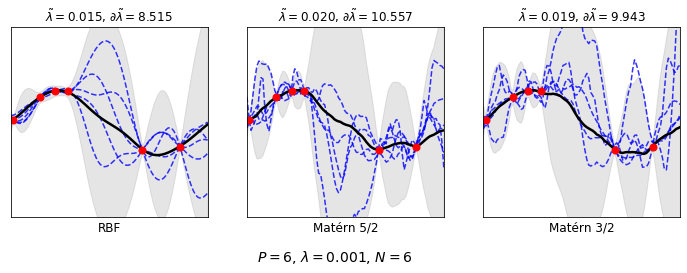

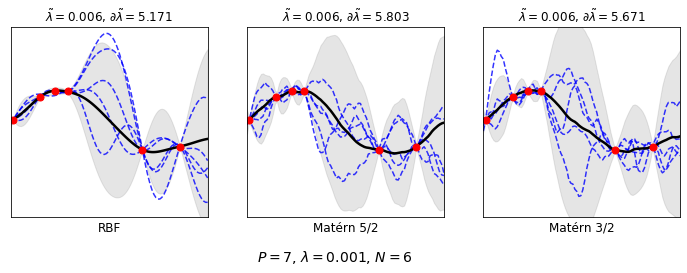

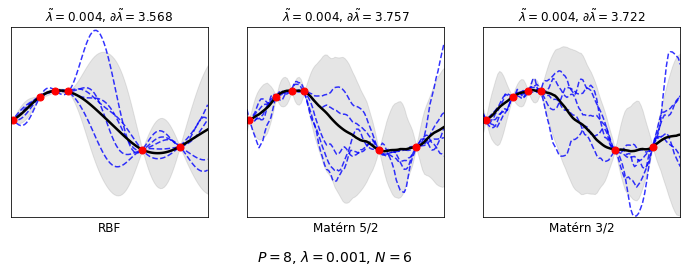

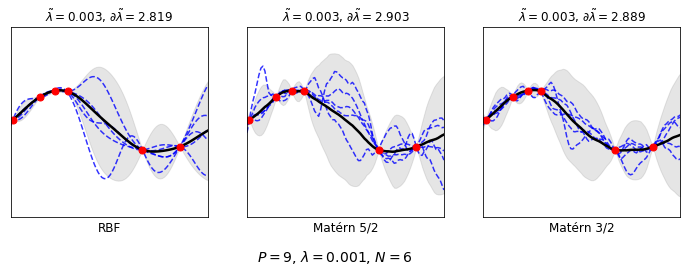

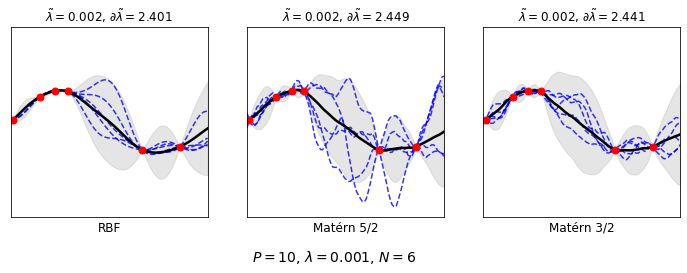

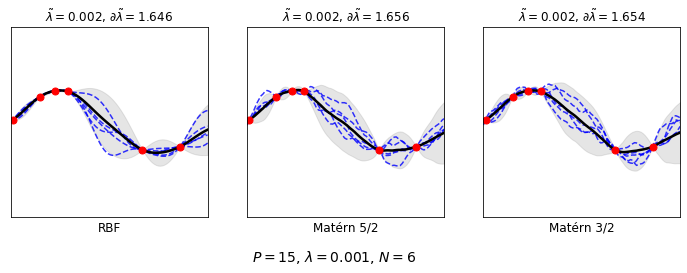

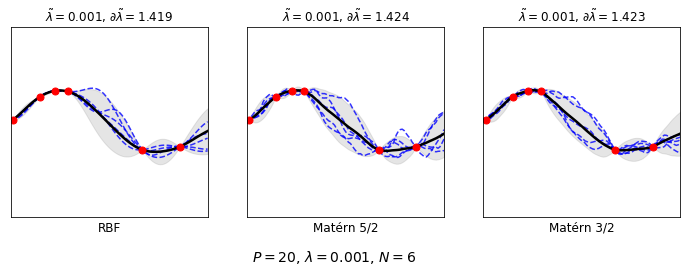

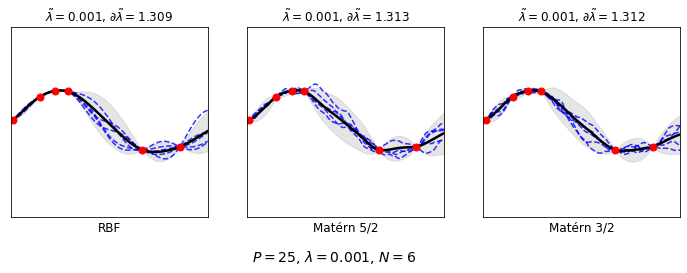

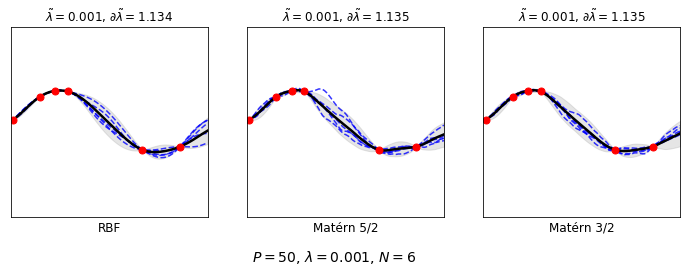

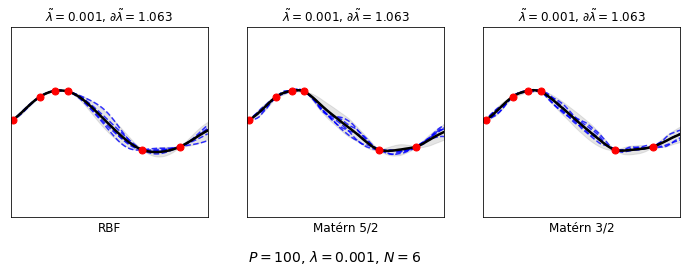

In [2]:
P_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 50, 100]

lambd_p = -3
lambd = 10**lambd_p

ker = -1
W = 1

cnt = 0 
for P in P_list:
    fig, axs = plt.subplots(1, 3) 
    fig.set_size_inches(12, 3.5)
    #fig.set_size_inches(19.20,4)
    
    suptit = "$P = %d$, $\lambda = %0.3f$, $N = 6$" % (P, lambd)
    fig.suptitle(suptit, fontsize=14, y = 0)
    
    #### RBF Kernel 
    
    ker_c = 1  
    Y2pred_all = pred_fun(lambd, P, ker_c)
    Y2pred_m = np.mean(Y2pred_all, axis=1)
    Y2pred_s = np.sqrt(np.var(Y2pred_all, axis=1))
    make_plot(Y2pred_m, Y2pred_s, axs[0]) 
    
    G1 = gram_matrix(X1, W, flag = ker_c)
    eigs, vects = LA.eig(G1)
    eigs = eigs.real
    eff_r, eff_dr = solve_eff_ridge(eigs, P, lambd)
    subtit = "$\~{\lambda} = %0.3f$, $\partial \~{\lambda} = %0.3f$" % (eff_r, eff_dr)
    
    axs[0].set_title(subtit, fontsize = 12)
    axs[0].set_xlabel("RBF", fontsize=12)
    
    #### Matérn-5/2 Kernel

    ker_c = -1 
    Y2pred_all = pred_fun(lambd, P, ker_c)
    Y2pred_m = np.mean(Y2pred_all, axis=1)
    Y2pred_s = np.sqrt(np.var(Y2pred_all, axis=1))
    make_plot(Y2pred_m, Y2pred_s, axs[1]) 
    
    G1 = gram_matrix(X1, W, flag = ker_c)
    eigs, vects = LA.eig(G1)
    eigs = eigs.real
    eff_r, eff_dr = solve_eff_ridge(eigs, P, lambd)
    subtit = "$\~{\lambda} = %0.3f$, $\partial \~{\lambda} = %0.3f$" % (eff_r, eff_dr)
    
    axs[1].set_title(subtit, fontsize = 12)
    axs[1].set_xlabel("Matérn 5/2", fontsize=12)
    
    #### Matérn-3/2 Kernel

    ker_c = 0
    Y2pred_all = pred_fun(lambd, P, ker_c)
    Y2pred_m = np.mean(Y2pred_all, axis=1)
    Y2pred_s = np.sqrt(np.var(Y2pred_all, axis=1))
    make_plot(Y2pred_m, Y2pred_s, axs[2]) 
    
    G1 = gram_matrix(X1, W, flag = ker_c)
    eigs, vects = LA.eig(G1)
    eigs = eigs.real
    eff_r, eff_dr = solve_eff_ridge(eigs, P, lambd)
    subtit = "$\~{\lambda} = %0.3f$, $\partial \~{\lambda} = %0.3f$" % (eff_r, eff_dr)
    
    axs[2].set_title(subtit, fontsize = 12)
    axs[2].set_xlabel("Matérn 3/2", fontsize=12)
    
    # savetit = f"case{cnt+1}.pdf" 
    # plt.savefig(savetit, dip = 1200, bbox_inches= 'tight')
    plt.show()
    cnt += 1